/tmp/ipykernel_2074483/2935769235.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


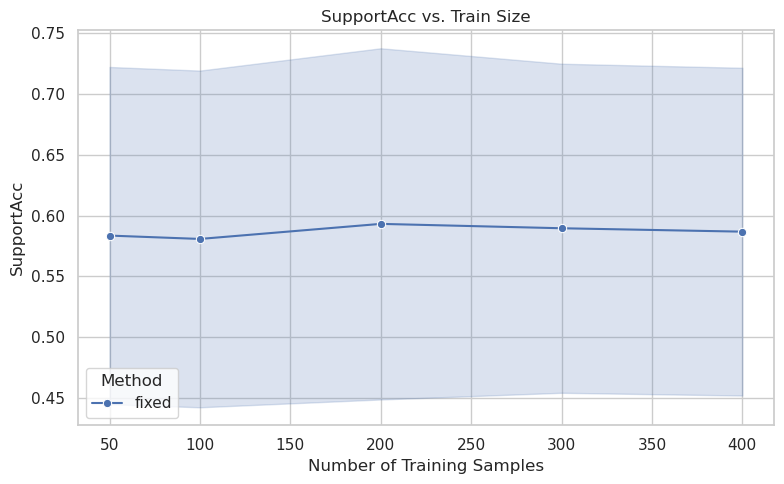

/tmp/ipykernel_2074483/2935769235.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


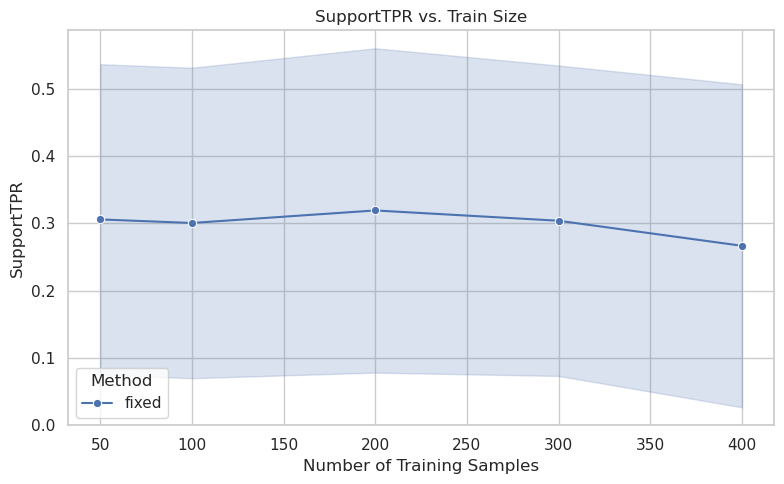

/tmp/ipykernel_2074483/2935769235.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


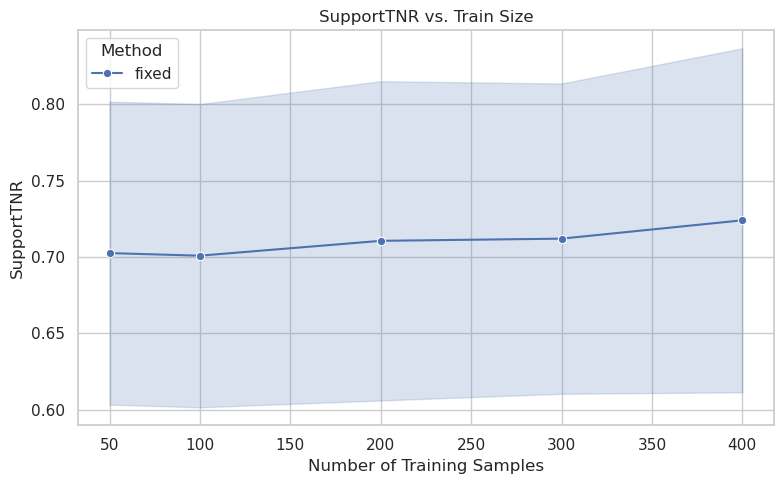

/tmp/ipykernel_2074483/2935769235.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


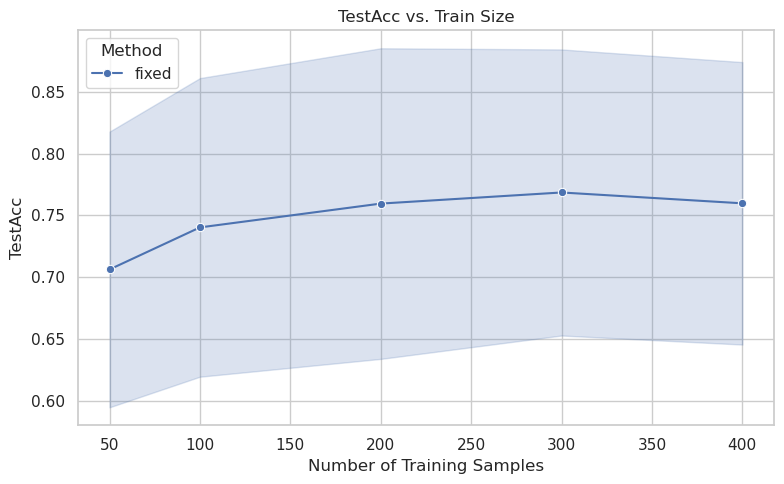

/tmp/ipykernel_2074483/2935769235.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


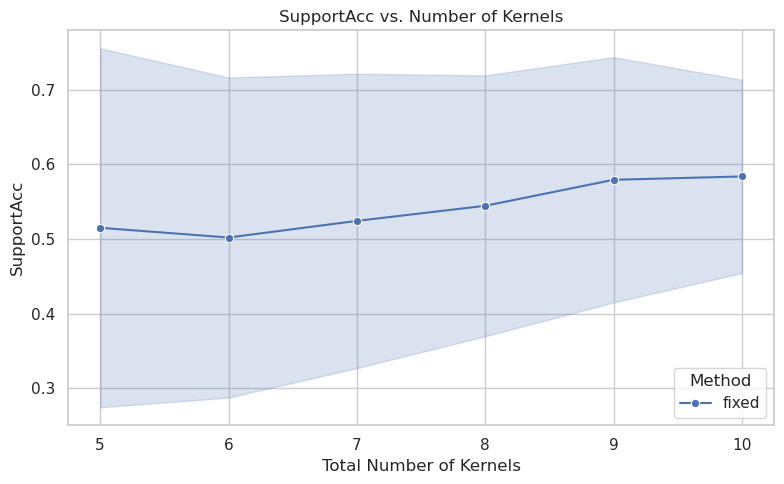

/tmp/ipykernel_2074483/2935769235.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


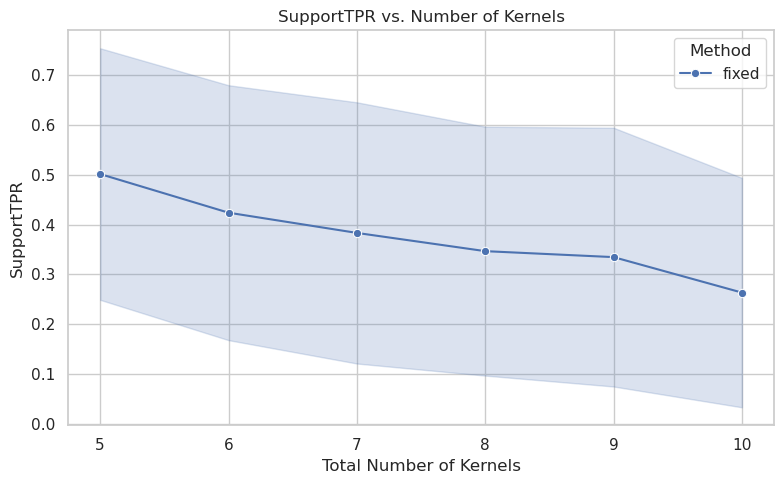

/tmp/ipykernel_2074483/2935769235.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


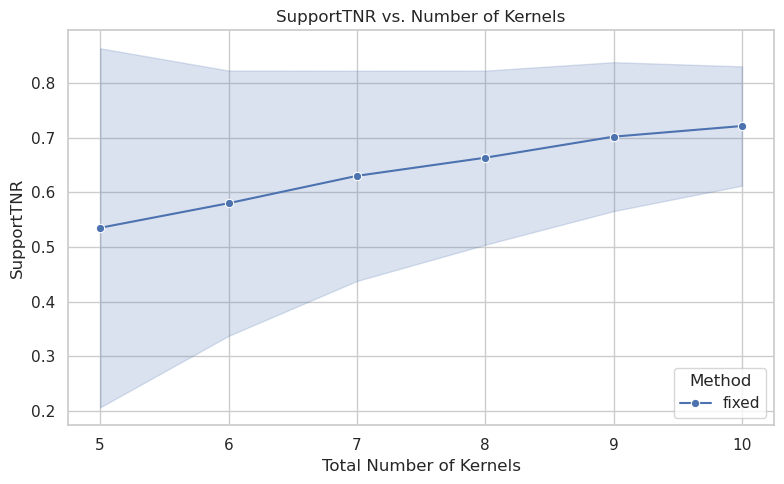

/tmp/ipykernel_2074483/2935769235.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


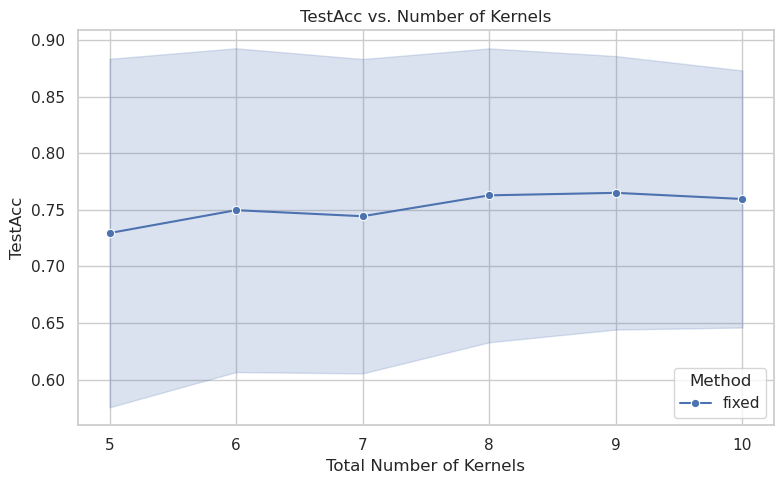

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("./scripts/run_synthetic_experiments_results_20254024_214032.csv")

# Ensure correct data types
df['TrainSize'] = df['TrainSize'].astype(int)
df['TotalKernels'] = df['TotalKernels'].astype(int)

# Separate the experiment types
df_vary_n = df[df['ExpType'] == 'vary_n']
df_vary_k = df[df['ExpType'] == 'vary_k']

# Set seaborn style
sns.set(style="whitegrid")

# === Plot 3: SupportAcc, TPR, TNR, TestAcc vs Train Size ===
metrics = ['SupportAcc', 'SupportTPR', 'SupportTNR', 'TestAcc']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=df_vary_n,
        x='TrainSize',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    plt.title(f'{metric} vs. Train Size')
    plt.ylabel(metric)
    plt.xlabel('Number of Training Samples')
    plt.legend(title='Method')
    plt.tight_layout()
    plt.show()

# === Plot 4: SupportAcc, TPR, TNR, TestAcc vs Number of Kernels ===
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=df_vary_k,
        x='TotalKernels',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    plt.title(f'{metric} vs. Number of Kernels')
    plt.ylabel(metric)
    plt.xlabel('Total Number of Kernels')
    plt.legend(title='Method')
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2074483/2699961204.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


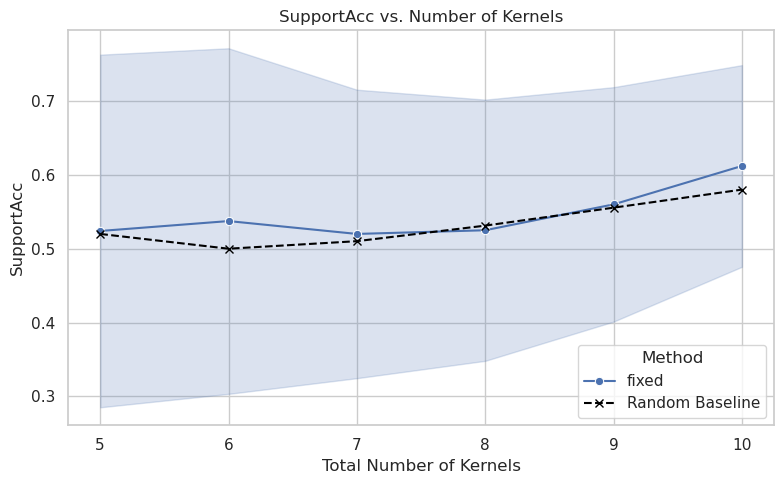

/tmp/ipykernel_2074483/2699961204.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


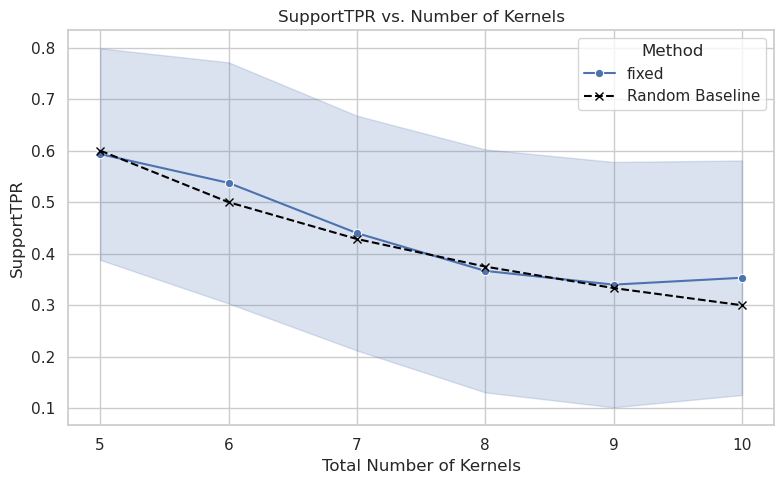

/tmp/ipykernel_2074483/2699961204.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


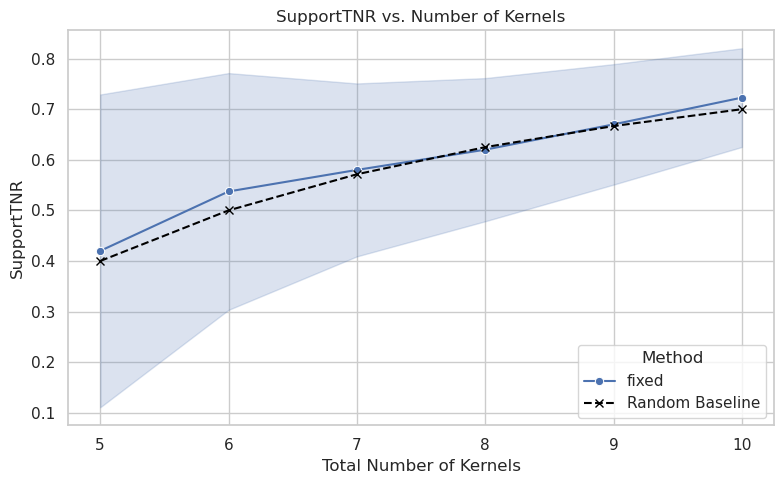

/tmp/ipykernel_2074483/2699961204.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


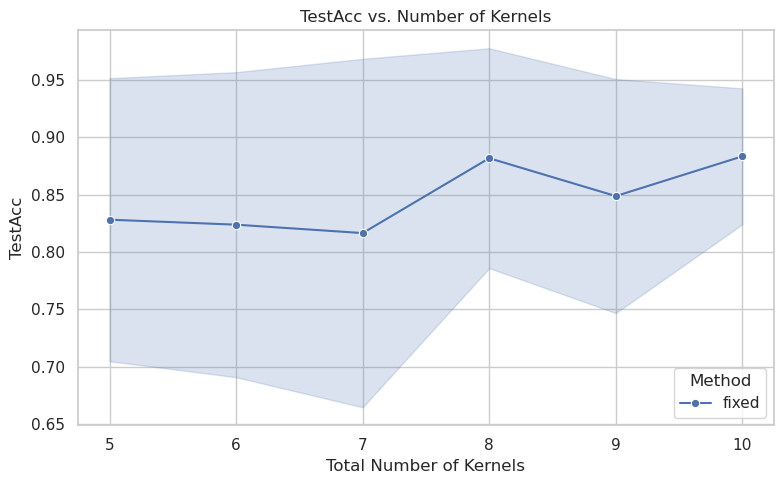

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = pd.read_csv("./scripts/run_synthetic_experiments_results_20252324_202318.csv")

# Ensure proper types
df['TrainSize'] = df['TrainSize'].astype(int)
df['TotalKernels'] = df['TotalKernels'].astype(int)

# Separate experiment type
df_vary_k = df[df['ExpType'] == 'vary_k']

# === Baseline expectations for random selection (assume you guess k = 3 and true = 3) ===
def compute_random_baseline(T=3):
    rows = []
    for R in sorted(df_vary_k['TotalKernels'].unique()):
        k = T  # assume the guess is always of size T
        tp = k * T / R
        fn = T - tp
        fp = k - tp
        tn = (R - T) * (R - k) / R

        support_acc = (tp + tn) / R
        tpr = tp / T
        tnr = tn / (R - T) if R > T else 0

        rows.append({
            'TotalKernels': R,
            'SupportAcc': support_acc,
            'SupportTPR': tpr,
            'SupportTNR': tnr,
        })
    return pd.DataFrame(rows)

baseline_df = compute_random_baseline()

# === Plot metrics with baseline ===
sns.set(style="whitegrid")
metrics = ['SupportAcc', 'SupportTPR', 'SupportTNR', 'TestAcc']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    
    # Lineplot for actual results
    sns.lineplot(
        data=df_vary_k,
        x='TotalKernels',
        y=metric,
        hue='Method',
        estimator='mean',
        ci='sd',
        marker='o'
    )
    
    # Overlay dashed line for random selection baseline
    if metric in baseline_df.columns:
        plt.plot(
            baseline_df['TotalKernels'],
            baseline_df[metric],
            color='black',
            linestyle='--',
            marker='x',
            label='Random Baseline'
        )

    plt.title(f'{metric} vs. Number of Kernels')
    plt.ylabel(metric)
    plt.xlabel('Total Number of Kernels')
    plt.legend(title='Method', loc='best')
    plt.tight_layout()
    plt.show()


In [4]:
# Cell 1: Imports, kernel specs, and helper functions
import numpy as np
import matplotlib.pyplot as plt

# define the same kernel specs used in simulation
BASE_KERNEL_SPECS = [
    # Polynomial kernels
    {"type": "polynomial", "params": {"degree": 2, "c": 0.0}},
    {"type": "polynomial", "params": {"degree": 3, "c": 1.0}},
    {"type": "polynomial", "params": {"degree": 4, "c": 5.0}},
    {"type": "polynomial", "params": {"degree": 5, "c": 10.0}},
    {"type": "polynomial", "params": {"degree": 5, "c": 20.0}},


    # RBF kernels
    {"type": "rbf", "params": {"gamma": 0.01}},
    {"type": "rbf", "params": {"gamma": 0.1}},
    {"type": "rbf", "params": {"gamma": 1.0}},
    {"type": "rbf", "params": {"gamma": 10.0}},
    {"type": "rbf", "params": {"gamma": 20.0}},

]


def mixed_kernel_matrix(X1, X2, specs, betas):
    """
    Compute combined Gram Kc(x_i, x_j) = sum_k betas[k] * K_spec[k](X1,X2).
    """
    N1, N2 = X1.shape[0], X2.shape[0]
    Kc = np.zeros((N1, N2))
    for spec, β in zip(specs, betas):
        if β == 0:
            continue
        if spec["type"] == "rbf":
            γ = spec["params"]["gamma"]
            diff = X1[:, None, :] - X2[None, :, :]
            D2 = np.sum(diff**2, axis=2)
            K = np.exp(-γ * D2)
        else:  # polynomial
            d = spec["params"]["degree"]
            c = spec["params"].get("c", 1.0)
            K = (0.01* X1 @ X2.T + c) ** d
        Kc += β * K
    return Kc

In [60]:
# Cell 2: Load .npz data + kernel spec from JSON
import numpy as np
import json
import os

replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r05.npz"
data = np.load(replicate_path)

X_all      = data["X_train"]    # use X_train for both true and estimated grid
X_tr       = data["X_train"]
X_te       = data["X_test"]
alpha_true = data["alpha_true"]
b_true     = data["b_true"]
beta_true  = data["beta_true"]
alpha_est  = data["alpha_est"]
b_est      = data["b_est"]
beta_est   = data["beta_est"]
y_tr       = data["y_train"]
y_te       = data["y_test"]
true_idx   = np.array(data["true_idx"]) - 1

# Load kernel specs from JSON
json_path = replicate_path.replace(".npz", "_kernels.json")
with open(json_path, "r") as f:
    kernels = json.load(f)


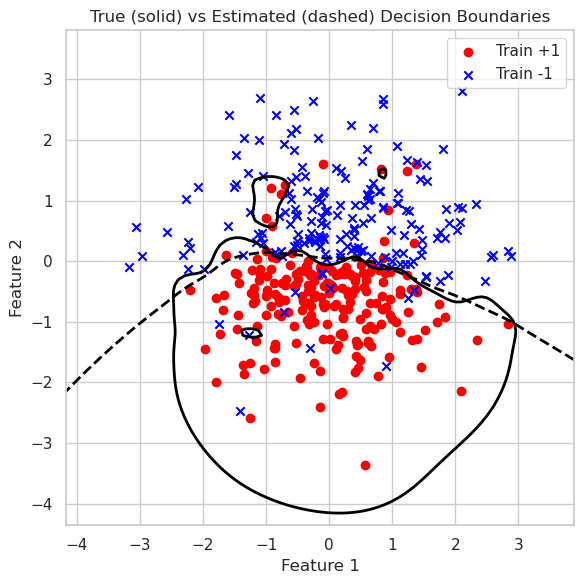

In [71]:
# derive full X for true
X_full = np.vstack([X_tr, X_te])

# only use specs matching β length
used_specs = np.array(kernels)

# Cell 3: Build grid and compute decision surfaces
margin = 1.0
x0, x1 = X_full[:,0].min() - margin, X_full[:,0].max() + margin
y0, y1 = X_full[:,1].min() - margin, X_full[:,1].max() + margin
xx, yy = np.meshgrid(
    np.linspace(x0, x1, 100),
    np.linspace(y0, y1, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# True decision surface
Kg_true = mixed_kernel_matrix(grid, X_full, used_specs[true_idx], beta_true)
f_true  = Kg_true @ (alpha_true) + b_true
Z_true  = f_true.reshape(xx.shape)

# Estimated decision surface
Kg_est  = mixed_kernel_matrix(grid, X_tr, used_specs, beta_est)
f_est   = Kg_est @ (alpha_est * y_tr) + b_est
Z_est   = f_est.reshape(xx.shape)

# Cell 4: Plot boundaries and training points
plt.figure(figsize=(6,6))
plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")
plt.scatter(X_tr[y_tr==1,0],  X_tr[y_tr==1,1],  c='red', marker='o', label='Train +1')
plt.scatter(X_tr[y_tr==-1,0], X_tr[y_tr==-1,1], c='blue',marker='x', label='Train -1')
plt.title("True (solid) vs Estimated (dashed) Decision Boundaries")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.legend(); plt.tight_layout(); plt.show()


•⁠  ⁠fix some values of k = 3, 5, 10, 15
•⁠  ⁠⁠let q = 20, …, 200 (increments of 20)
•⁠  ⁠⁠x-axis would be q, train accuracy, test accuracy method a (k=3 is one curve, k=5 different line, + the benchmarks)
•⁠  ⁠⁠x-axis would be q, number of kernels actually selected (up to a tol of 1e-6)

In [69]:
np.hstack([y_tr, y_te])

array([-1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

def generate_mkl_data(n_samples=300, n_features=2, gamma=0.5, poly_degree=2, rbf_components=100):
    X = np.random.randn(n_samples, n_features)

    # Kernel 1: Linear -> phi_1(x) = x
    phi_linear = X

    # Kernel 2: Polynomial -> phi_2(x) = poly features of degree 2
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    phi_poly = poly.fit_transform(X)

    # Kernel 3: RBF -> phi_3(x) ≈ Random Fourier Features
    rbf = RBFSampler(gamma=gamma, n_components=rbf_components, random_state=42)
    phi_rbf = rbf.fit_transform(X)

    # Combina todos os mapeamentos em um único vetor de features
    phi_combined = np.hstack([phi_linear, phi_poly, phi_rbf])

    # Cria vetor de pesos e gera y
    w = np.random.randn(phi_combined.shape[1])
    y = np.sign(phi_combined @ w + 0.1 * np.random.randn(n_samples))

    return X, y, phi_combined

# Gerar dados
X_mkl, y_mkl, _ = generate_mkl_data()

# Visualizar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_mkl[:, 0], X_mkl[:, 1], c=y_mkl, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Dados Sintéticos para Multiple Kernel Learning")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
y_tr.shape

(400,)

In [34]:
used_specs[true_idx]

array([{'params': {'degree': 3, 'c': 1.0}, 'type': 'polynomial'},
       {'params': {'degree': 4, 'c': 5.0}, 'type': 'polynomial'},
       {'params': {'gamma': 20.0}, 'type': 'rbf'}], dtype=object)

In [35]:
beta_true

array([0.32296297, 0.34449648, 0.33254054])

In [65]:
Kg_est  = mixed_kernel_matrix(X_tr, X_tr, used_specs, beta_est)
f_est = Kg_est @ alpha_est + b_est

(np.where(f_est >= 0, 1, -1) == y_tr).mean()

0.4875

(400,)

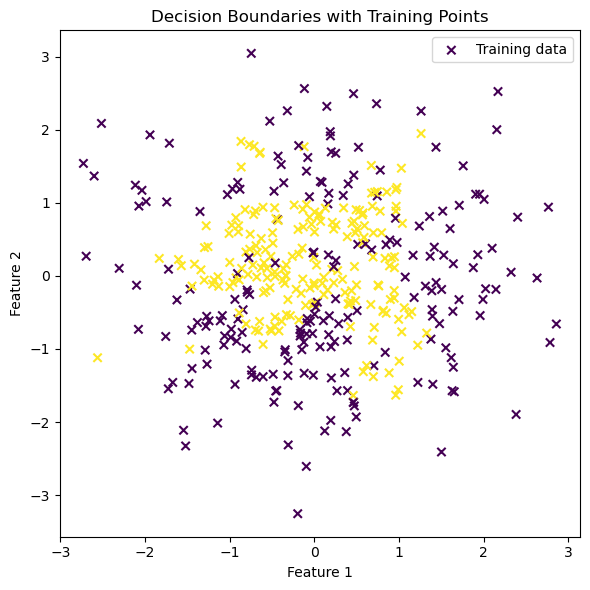

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r01.npz"
data = np.load(replicate_path)
X_tr = data["X_train"]  # shape (n_train, 2)
y_tr = data["y_train"]
X_te = data["X_test"]   # shape (n_test, 2)
# alpha_true = data["alpha_true"]  # shape (N_total,)
# beta_true  = data["beta_true"]   # length K
# alpha_est  = data["alpha_est"]   # shape (n_train,)
# beta_est   = data["beta_est"]    # length K


# Cell 4: Plot boundaries and only training points
plt.figure(figsize=(6,6))

# true boundary (solid)
# plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
# estimated boundary (dashed)
# plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")

# scatter only the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, marker='x', label='Training data')

plt.title("Decision Boundaries with Training Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


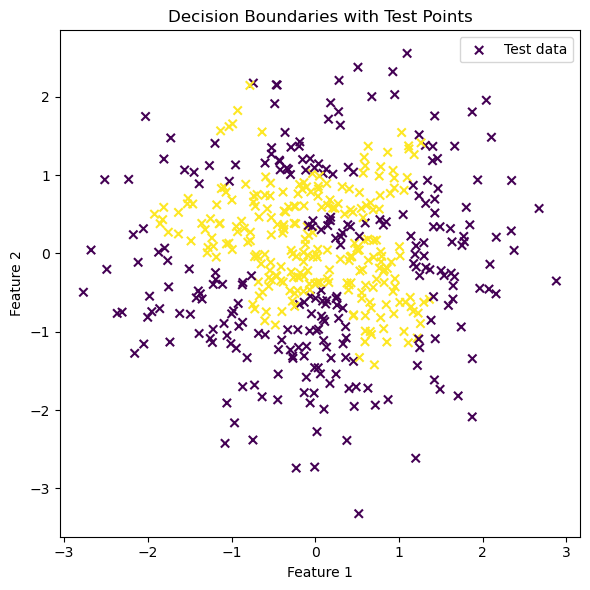

In [29]:
replicate_path = "./scripts/mkl_sim_results/rep_vary_k_p5_r01.npz"
data = np.load(replicate_path)
X_tr = data["X_train"]  # shape (n_train, 2)
X_te = data["X_test"]   # shape (n_test, 2)
# alpha_true = data["alpha_true"]  # shape (N_total,)
# beta_true  = data["beta_true"]   # length K
# alpha_est  = data["alpha_est"]   # shape (n_train,)
# beta_est   = data["beta_est"]    # length K
y_tr = data["y_train"]
y_te = data["y_test"]

# Cell 4: Plot boundaries and only training points
plt.figure(figsize=(6,6))

# true boundary (solid)
# plt.contour(xx, yy, Z_true, levels=[0], linewidths=2, linestyles="solid", colors="black")
# estimated boundary (dashed)
# plt.contour(xx, yy, Z_est,  levels=[0], linewidths=2, linestyles="dashed", colors="black")

# scatter only the training points
plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te, marker='x', label='Test data')

plt.title("Decision Boundaries with Test Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

pd.DataFrame(y_te).value_counts()

0   
-1.0    251
 1.0    249
Name: count, dtype: int64